# XAUUSD

In [1]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [13]:
xau_ratios = [
    "WGC/GOLD_DAILY_USD", 
    "WGC/GOLD_DAILY_EUR",
    "WGC/GOLD_DAILY_TRY",
    "WGC/GOLD_DAILY_JPY",
    "WGC/GOLD_DAILY_GBP",
    "WGC/GOLD_DAILY_CAD",
    "WGC/GOLD_DAILY_CHF",
    "WGC/GOLD_DAILY_VND",
    "WGC/GOLD_DAILY_KRW",
    "WGC/GOLD_DAILY_RUB",
    "WGC/GOLD_DAILY_AUD",
    "WGC/GOLD_DAILY_MXN"
]

### Quandl data terms

Anyone seeking to use this code must first apply for an account with [Quandl](https://www.quandl.com) in order to receive an valid authetitciation key.

In [15]:
DIR_NAME = os.path.abspath(os.path.join(os.getcwd(), '..'))
FILEPATH = os.path.join(DIR_NAME, "auth.txt")

with open(FILEPATH, "r") as f:
    authtoken = f.read()

# Retrieve Data

In [14]:
xau_df_dict = {}


for ratio in tqdm(xau_ratios):
    name = ratio.lower().replace("/", "_")

    df = quandl.get(ratio, authtoken=authtoken)
    df.columns = [name]
    
    xau_df_dict[name] = df

100%|██████████| 12/12 [00:29<00:00,  2.01s/it]


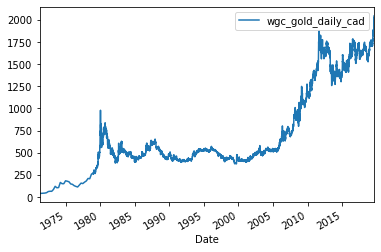

In [19]:
annualization_factor = 252.
window_size = [5, 20, 60, 120, 252]

features_df = factor_df.copy()

for window in tqdm(window_size):
    features_df['{}d_market_vol'.format(window)] = np.sqrt(
        (annualization_factor/window) * features_df['MKT'].rolling(window).var(ddof=0))
    
features_df.head()

b'NllEd3hGOEpteWc3czZGVVYzWGM='